# Preamble

In [ ]:
# Essentials
import os, sys, glob
import pandas as pd
import numpy as np
import nibabel as nib

# Stats
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import pingouin as pg

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [ ]:
sys.path.append('/Users/lindenmp/Dropbox/Work/ResProjects/NormativeNeuroDev_CrossSec_T1/code/func/')
from proj_environment import set_proj_env

In [3]:
train_test_str = 'squeakycleanExclude'
exclude_str = 'fsFinalExclude' # 't1Exclude' 'fsFinalExclude'
parc_str = 'lausanne' # 'schaefer' 'lausanne'
parc_scale = 250 # 200 400 | 60 125 250
extra_str = ''
parcel_names, parcel_loc, drop_parcels, num_parcels, yeo_idx, yeo_labels = set_proj_env(train_test_str = train_test_str, exclude_str = exclude_str,
                                                                            parc_str = parc_str, parc_scale = parc_scale, extra_str = extra_str)

### Setup output directory

In [4]:
print(os.environ['MODELDIR_BASE'])
print(os.environ['MODELDIR'])
if not os.path.exists(os.environ['MODELDIR']): os.makedirs(os.environ['MODELDIR'])

/Users/lindenmp/Dropbox/Work/ResProjects/NormativeNeuroDev_CrossSec_T1/analysis/normative/fsFinalExclude/squeakycleanExclude/lausanne_463
/Users/lindenmp/Dropbox/Work/ResProjects/NormativeNeuroDev_CrossSec_T1/analysis/normative/fsFinalExclude/squeakycleanExclude/lausanne_463


## Load data

In [5]:
# Load data
df = pd.read_csv(os.path.join(os.environ['MODELDIR_BASE'], 'df_pheno.csv'))
df.set_index(['bblid', 'scanid'], inplace = True)
print(df.shape)

(1266, 50)


In [6]:
# Load data
df_node = pd.read_csv(os.path.join(os.environ['MODELDIR_BASE'], 'df_node_base.csv'))
df_node.set_index(['bblid', 'scanid'], inplace = True)
print(df_node.shape)

(1266, 927)


In [7]:
df_node.head()

,,squeakycleanExclude,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,...,vol_453,vol_454,vol_455,vol_456,vol_457,vol_458,vol_459,vol_460,vol_461,vol_462
bblid,scanid,,,,,,,,,,,,,,,,,,,,,
80961,2632,1,4.305021,3.551248,4.234168,3.502731,3.085473,4.144540,2.969556,3.621975,4.071292,...,1709.0,1958.0,8637.0,4619.0,7168.0,1909.0,984.0,4627.0,2847.0,26827.0
80199,2637,0,3.914555,2.847562,3.568405,3.349391,3.631948,3.512844,2.789593,3.263227,3.653180,...,1308.0,1665.0,10744.0,4935.0,6354.0,2075.0,1206.0,5332.0,2913.0,30647.0
80812,2646,1,3.542897,2.986025,3.827047,3.205461,3.003906,3.173022,2.832034,3.304679,3.131183,...,1075.0,1695.0,11092.0,5080.0,7015.0,1957.0,1126.0,4834.0,2304.0,24872.0
80607,2647,1,2.942087,2.683437,3.361905,2.653382,3.067042,2.837791,3.069567,2.870836,3.491548,...,1301.0,1873.0,9063.0,5107.0,6378.0,1841.0,1187.0,4920.0,2281.0,22805.0
80249,2648,0,4.654933,2.790147,3.767340,3.535779,3.954282,3.329091,3.178253,3.185827,3.255947,...,1557.0,1865.0,9737.0,5271.0,6843.0,1776.0,1437.0,5378.0,2596.0,21498.0


# Plots

In [8]:
# Labels
sns.set(style='white', context = 'talk', font_scale = .8)

In [9]:
metrics = ('ct', 'vol')
df_node_mean = pd.DataFrame(index = df_node.index, columns = metrics)
for metric in metrics:
    df_node_mean[metric] = df_node.filter(regex = metric, axis = 1).mean(axis = 1)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


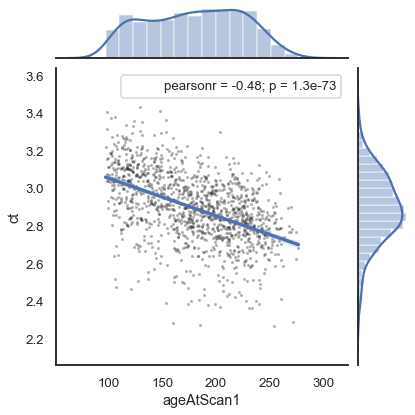

In [10]:
metric_x = 'ageAtScan1'
metric_y = 'ct'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


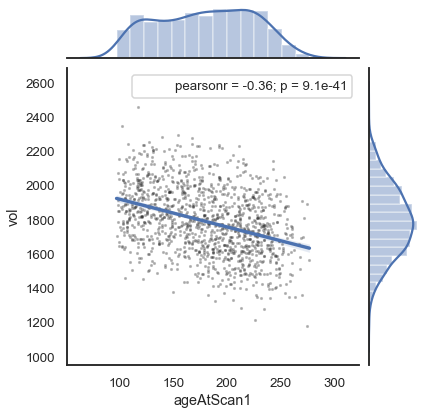

In [11]:
metric_x = 'ageAtScan1'
metric_y = 'vol'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

In [12]:
my_str = os.environ['MODELDIR'].split('/')[-1]
my_str = my_str.split('_')[-1]
my_str

'463'

In [13]:
df_node.shape

(1266, 927)

## Nuisance regression

In [14]:
nuis = ['averageManualRating']
print(nuis)
df_nuis = df[nuis]
df_nuis = sm.add_constant(df_nuis)

my_str = '|'.join(metrics); print(my_str)
cols = df_node.filter(regex = my_str, axis = 1).columns

mdl = sm.OLS(df_node.loc[:,cols].astype(float), df_nuis.astype(float)).fit()
y_pred = mdl.predict(df_nuis)
y_pred.columns = cols
df_node.loc[:,cols] = df_node.loc[:,cols] - y_pred

['averageManualRating']
ct|vol


In [15]:
df_node.head()

,,squeakycleanExclude,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,...,vol_453,vol_454,vol_455,vol_456,vol_457,vol_458,vol_459,vol_460,vol_461,vol_462
bblid,scanid,,,,,,,,,,,,,,,,,,,,,
80961,2632,1,0.222988,0.424336,0.441732,0.188271,-0.047969,0.442818,0.034927,0.252720,0.314493,...,351.096759,489.020865,-1097.338908,-154.578034,493.274282,-42.75886,-193.108346,-487.676028,299.61044,2399.565777
80199,2637,0,-0.167477,-0.279351,-0.224031,0.034931,0.498506,-0.188878,-0.145036,-0.106029,-0.103620,...,-49.903241,196.020865,1009.661092,161.421966,-320.725718,123.24114,28.891654,217.323972,365.61044,6219.565777
80812,2646,1,-0.539135,-0.140887,0.034612,-0.108999,-0.129536,-0.528701,-0.102595,-0.064576,-0.625617,...,-282.903241,226.020865,1357.661092,306.421966,340.274282,5.24114,-51.108346,-280.676028,-243.38956,444.565777
80607,2647,1,-1.139946,-0.443475,-0.430530,-0.661078,-0.066400,-0.863931,0.134938,-0.498420,-0.265252,...,-56.903241,404.020865,-671.338908,333.421966,-296.725718,-110.75886,9.891654,-194.676028,-266.38956,-1622.434223
80249,2648,0,0.572900,-0.336766,-0.025096,0.221319,0.820840,-0.372631,0.243624,-0.183429,-0.500852,...,199.096759,396.020865,2.661092,497.421966,168.274282,-175.75886,259.891654,263.323972,48.61044,-2929.434223


In [16]:
df_node_mean = pd.DataFrame(index = df_node.index, columns = metrics)
for metric in metrics:
    df_node_mean[metric] = df_node.filter(regex = metric, axis = 1).mean(axis = 1)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


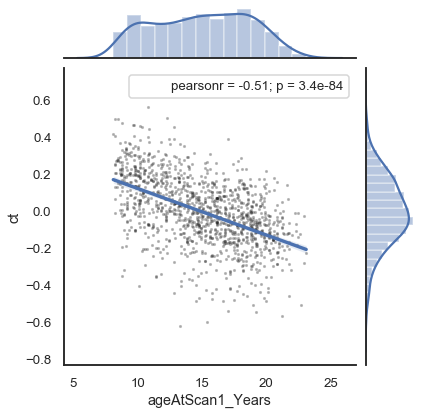

In [17]:
metric_x = 'ageAtScan1_Years'
metric_y = 'ct'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


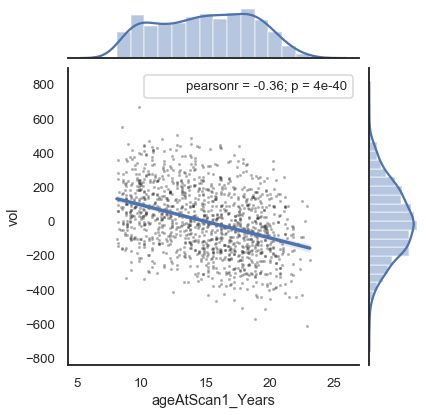

In [18]:
metric_x = 'ageAtScan1_Years'
metric_y = 'vol'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


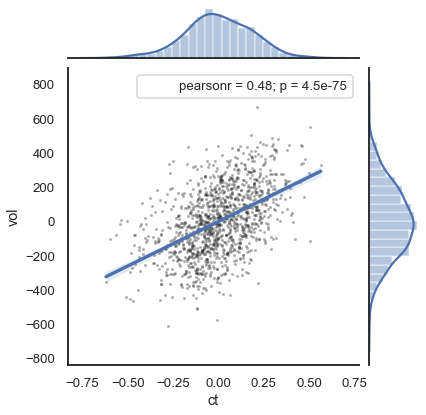

In [19]:
metric_x = 'ct'
metric_y = 'vol'
f = sns.jointplot(x = df_node_mean[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

In [20]:
R = np.zeros(num_parcels-1)
for i in range(0,num_parcels-1):
    R[i] = sp.stats.pearsonr(df_node.loc[:,'ct_'+str(i)],df_node.loc[:,'vol_'+str(i)])[0]

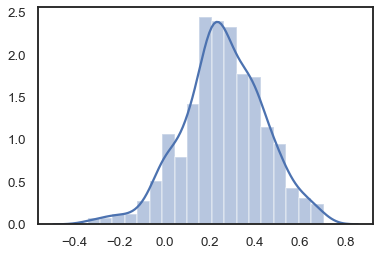

In [21]:
sns.distplot(R)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


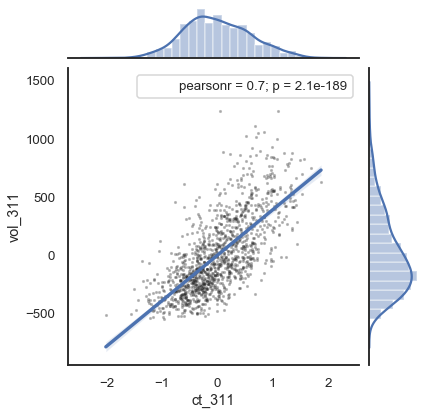

In [22]:
f = sns.jointplot(x = df_node['ct_'+str(np.argmax(R))], y = df_node['vol_'+str(np.argmax(R))], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


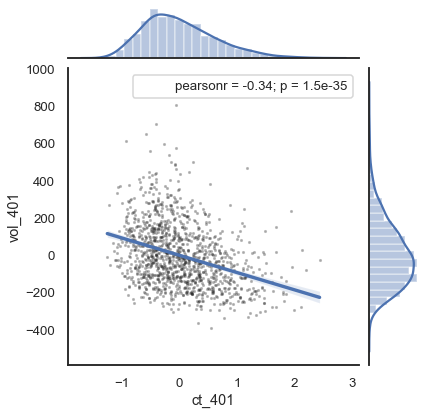

In [23]:
f = sns.jointplot(x = df_node['ct_'+str(np.argmin(R))], y = df_node['vol_'+str(np.argmin(R))], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

In [24]:
df_node.isna().any().any()

False

## Save out

In [25]:
# Save out
df_node.to_csv(os.path.join(os.environ['MODELDIR'], 'df_node_clean.csv'))